In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/kaggle/input/amazon-reviews-us-electronics/amazon_reviews_us_Electronics_v1_00.tsv", sep='\t', on_bad_lines='skip')
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


### Description of each column in the Amazon dataset:

1. `marketplace`: A identifier for the Amazon marketplace. 
2. `customer_id`: A unique identifier for the customer who has written the review. Each customer has a unique customer_id.
3. `review_id`: A unique identifier for the product review.
4. `product_id`: A unique identifier for the product being reviewed. This is an ASIN (Amazon Standard Identification Number)
5. `product_parent`: A unique identifier for the parent product of the reviewed product. Multiple product variants (e.g., different colors or sizes of the same product) can share the same parent ID.
6. `product_title`: The title of the reviewed product.
7. `product_category`: The category or type of the reviewed product
8. `star_rating`: The rating given by the customer in their review, ranging from 1 to 5 stars, with 1 being the lowest and 5 being the highest.
9. `helpful_votes`: The number of helpful votes this review has received from other customers.
10. `total_votes`: The total number of votes (helpful and not helpful) this review has received from other customers.
11. `vine`: A binary flag (e.g., 'Y' or 'N') indicating whether the review was written as part of the Amazon Vine program. The Vine program invites trusted reviewers to write reviews for new and pre-release products.
12. `verified_purchase`: A binary flag (e.g., 'Y' or 'N') indicating whether the review was written by a customer who purchased the product on Amazon.
13. `review_headline`: The title of the customer's review.
14. `review_body`: The full text of the customer's review.
15. `review_date`: The date when the review was posted in the format 'YYYY-MM-DD'.

In [2]:
# Checking Column Names
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [3]:
# Checking the shape of data
df.shape

(3091024, 15)

In [4]:
# Checking for duplicates
df.duplicated().sum()

0

In [5]:
# Checking missing values
df.isna().sum()

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title          4
product_category       0
star_rating            0
helpful_votes          0
total_votes            0
vine                   0
verified_purchase      0
review_headline       39
review_body          147
review_date           24
dtype: int64

As can be seen from the given dataset, there is only one marketplace, "US", and just a single product category, "Electronics". These columns do not provide any additional information, so we can drop them

In [6]:
# Checking the num of unique values in each column
df.nunique()

marketplace                1
customer_id          2152773
review_id            3091024
product_id            185774
product_parent        166173
product_title         167864
product_category           1
star_rating                5
helpful_votes            895
total_votes              934
vine                       2
verified_purchase          2
review_headline      1635683
review_body          2894833
review_date             5904
dtype: int64

In [7]:
df.drop(['marketplace', 'product_category'], axis=1, inplace=True)
df['verified_purchase'] = df['verified_purchase'].apply(lambda x: 0 if x == 'N' else 1)
df['vine'] = df['vine'].apply(lambda x: 0 if x == 'N' else 1)

In [8]:
# Checking the types of variables
df.dtypes

customer_id           int64
review_id            object
product_id           object
product_parent        int64
product_title        object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                  int64
verified_purchase     int64
review_headline      object
review_body          object
review_date          object
dtype: object

## Univariate analysis

In [9]:
sns.set(style='whitegrid')
sns.set_palette('pastel')

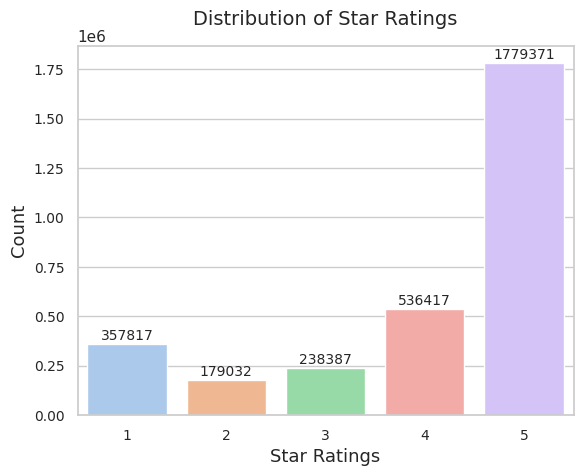

In [10]:
# Analyze the distribution of star ratings:

ax = sns.countplot(x='star_rating', data=df)

plt.title('Distribution of Star Ratings', fontsize=14, pad=15)
plt.xlabel('Star Ratings', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline',
                fontsize=10,
                xytext=(0, 3),
                textcoords='offset points')

plt.show()

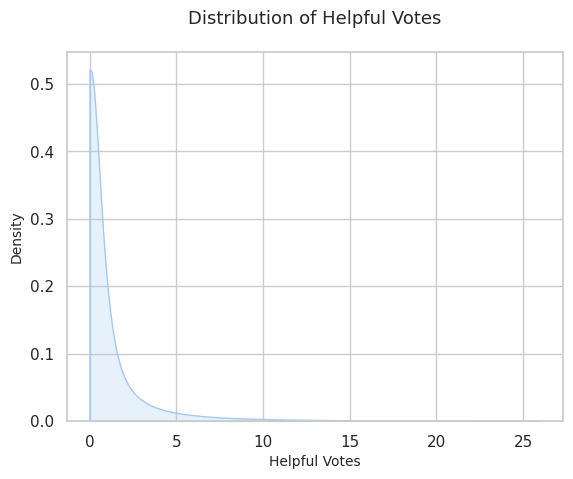

In [11]:
sns.kdeplot(x='helpful_votes', data=df, clip=(0, df['helpful_votes'].quantile(0.99)), fill=True, bw_adjust=0.5)
plt.title('Distribution of Helpful Votes', fontsize=13, pad=20)
plt.xlabel('Helpful Votes', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

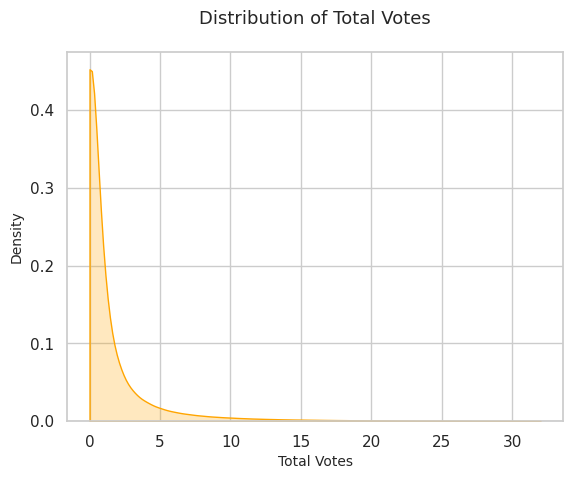

In [12]:
sns.kdeplot(x='total_votes', data=df, clip=(0, df['total_votes'].quantile(0.99)), fill=True, bw_adjust=0.5, color='orange')
plt.title('Distribution of Total Votes', fontsize=13, pad=20)
plt.xlabel('Total Votes', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

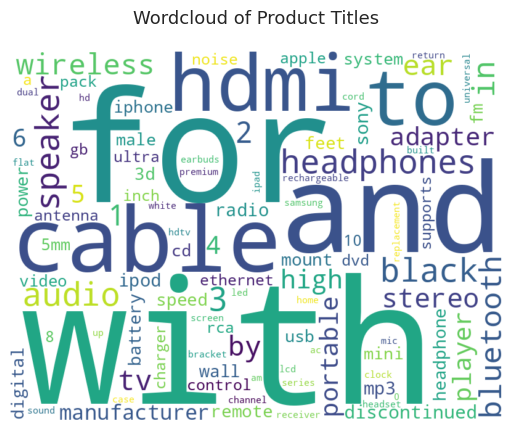

In [13]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import re

def preprocess_text(text):
    text = re.sub(r'\W+', ' ', str(text))
    text = text.lower()
    return text

product_titles = [preprocess_text(title) for title in df['product_title'] if pd.notna(title)]
product_titles_text = ' '.join(product_titles)

stopwords = set(STOPWORDS)
stopwords.update(["nan", "NaN"])

n_top_words = 100
product_titles_counter = Counter(' '.join(product_titles).split()).most_common(n_top_words)

product_title_wordcloud = WordCloud(stopwords=stopwords, background_color='white', colormap='viridis', width=800, height=600).generate_from_frequencies(dict(product_titles_counter))
plt.imshow(product_title_wordcloud, interpolation='bilinear')
plt.title('Wordcloud of Product Titles', fontsize=13, pad=20)
plt.axis('off')
plt.show()

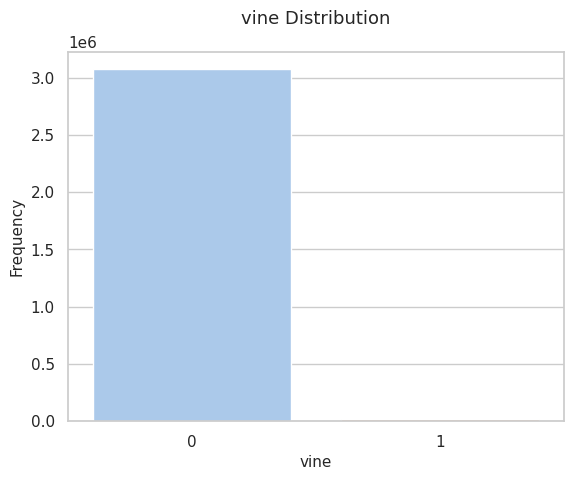

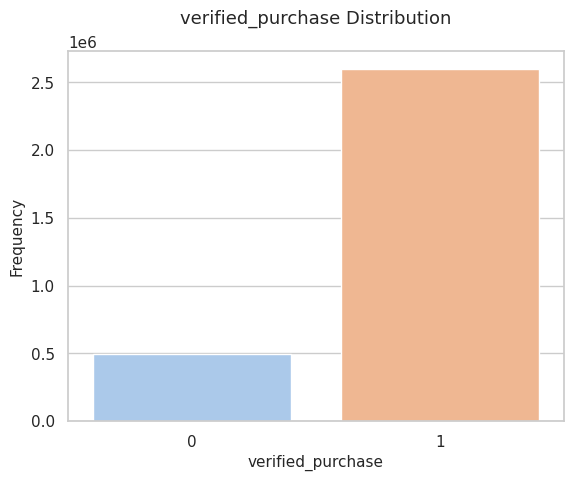

In [14]:
categorical_columns = ['vine', 'verified_purchase']

for column in categorical_columns:
    category_counts = df[column].value_counts()

    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title(f"{column} Distribution", fontsize=13, pad=20)
    plt.xlabel(column, fontsize=11)
    plt.ylabel("Frequency", fontsize=11)
    plt.show()

## Bivariate analysis

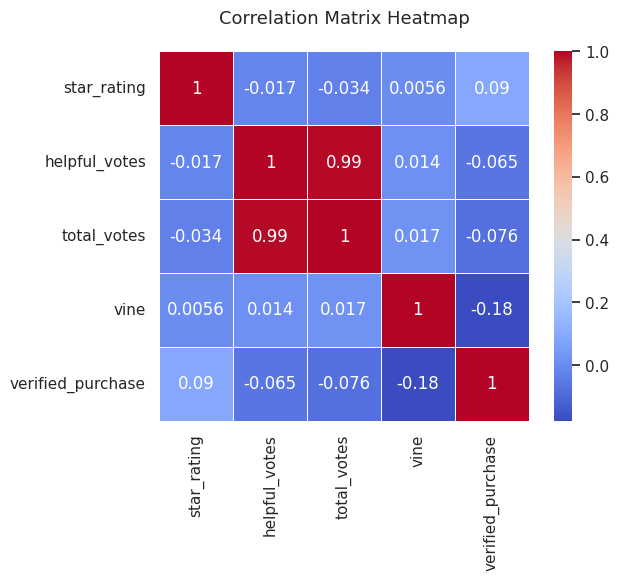

In [15]:
numerical_columns = ['star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase']

hm = sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Matrix Heatmap', fontsize=13, pad=20)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)
plt.show()

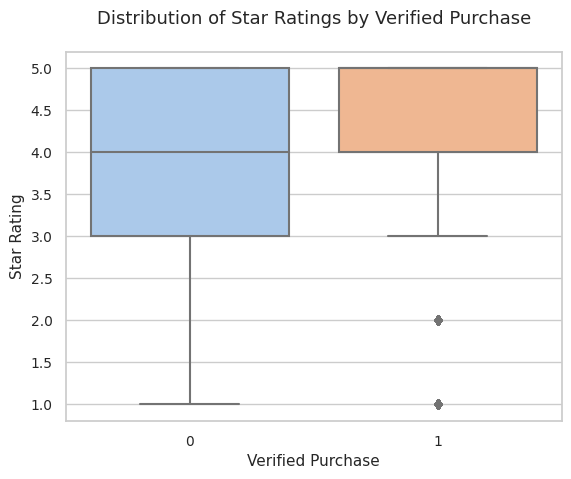

In [16]:
sns.boxplot(x='verified_purchase', y='star_rating', data=df)
plt.title('Distribution of Star Ratings by Verified Purchase', fontsize=13, pad=20)
plt.xlabel('Verified Purchase', fontsize=11)
plt.ylabel('Star Rating', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

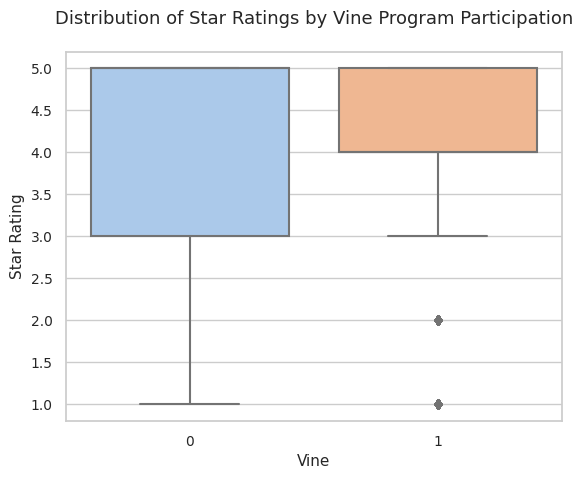

In [17]:
sns.boxplot(x='vine', y='star_rating', data=df)
plt.title('Distribution of Star Ratings by Vine Program Participation', fontsize=13, pad=20)
plt.xlabel('Vine', fontsize=11)
plt.ylabel('Star Rating', fontsize=11)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [18]:
reviews_per_product_id = df['product_id'].value_counts().reset_index()
reviews_per_product_id.columns = ['product_id', 'num_reviews']
top_10_product_ids = reviews_per_product_id.head(10)
product_titles = df[['product_id', 'product_title']].drop_duplicates()
top_10_products = top_10_product_ids.merge(product_titles, on='product_id')

top_10_products

,product_id,num_reviews,product_title
0,B003L1ZYYM,15334,AmazonBasics High-Speed HDMI Cable - 6.5 Feet ...
1,B0002L5R78,11166,High Speed HDMI Cable (1.5 Feet) With Ethernet...
2,B003EM8008,9766,Panasonic ErgoFit In-Ear Earbud Headphone
3,B0012S4APK,9359,"Cheetah APTMM2B TV Wall Mount for 20-75"" TVs u..."
4,B0001FTVEK,8793,Sennheiser On-Ear 926MHz Wireless RF Headphone...
5,B000WYVBR0,7835,"VideoSecu ML531BE TV Wall Mount for most 22""-5..."
6,B0019EHU8G,7586,Mediabridge ULTRA Series HDMI Cable (3 Foot) -...
7,B00F5NE2KG,6688,"Bluetooth Speaker, DKnight Magicbox Ultra-Port..."
8,B004QK7HI8,6536,"Mohu Leaf 30 TV Antenna, Indoor, 30 Mile Range..."
9,B00D5Q75RC,6062,Bose SoundLink Mini Bluetooth Speaker


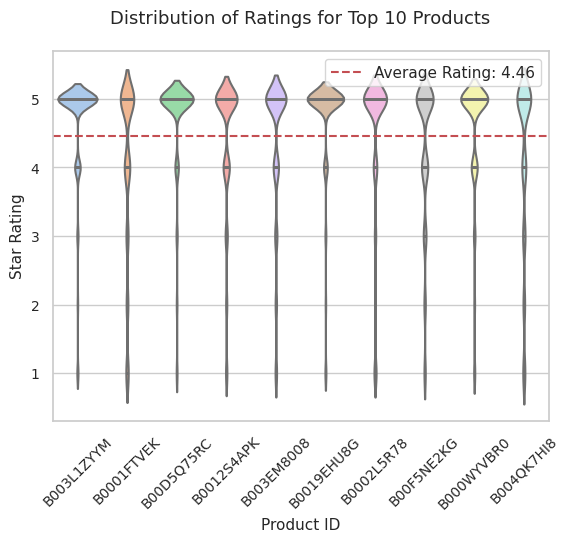

In [19]:
top_10_products_df = df[df['product_id'].isin(top_10_product_ids['product_id'])]

sns.violinplot(x='product_id', y='star_rating', data=top_10_products_df, inner="stick")
average_rating = top_10_products_df['star_rating'].mean()

plt.axhline(y=average_rating, color='r', linestyle='--', label=f'Average Rating: {average_rating:.2f}')
plt.title('Distribution of Ratings for Top 10 Products', fontsize=13, pad=20)
plt.xlabel('Product ID', fontsize=11)
plt.ylabel('Star Rating', fontsize=11)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

In [20]:
customer_stats = df.groupby('customer_id').agg({'product_id': 'count', 'star_rating': 'mean'})
customer_stats.columns = ['num_reviews', 'avg_star_rating']

customer_stats = customer_stats.sort_values(by='num_reviews', ascending=False)
top_10_customers = customer_stats.head(10)
top_10_customers.reset_index()

,customer_id,num_reviews,avg_star_rating
0,49266466,234,4.307692
1,53075795,198,4.106061
2,30669680,190,3.473684
3,53037408,180,4.861111
4,50820654,171,4.538012
5,52938899,166,4.331325
6,44834233,159,4.798742
7,50027179,158,4.601266
8,39789300,154,4.811688
9,32038204,149,4.704698


In [21]:
reviews_per_user = df['customer_id'].value_counts()
mean_reviews_per_user = np.mean(reviews_per_user)

print(f"Each customer makes an average of {mean_reviews_per_user:.2f} reviews.")

Each customer makes an average of 1.44 reviews.


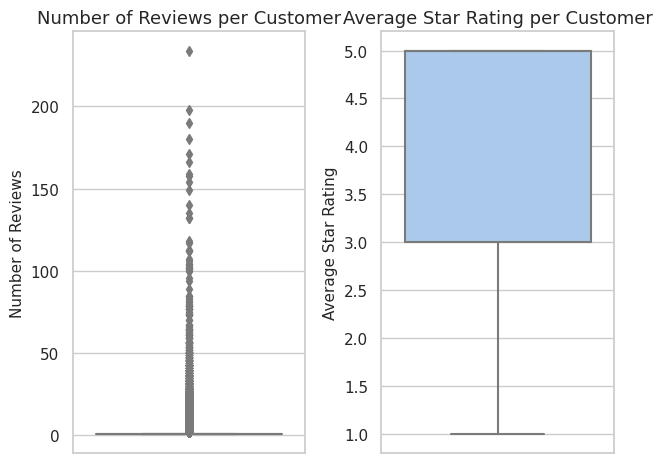

In [22]:
plt.subplot(1, 2, 1)
sns.boxplot(y=customer_stats['num_reviews'])
plt.title("Number of Reviews per Customer", fontsize=13)
plt.ylabel("Number of Reviews", fontsize=11)

plt.subplot(1, 2, 2)
sns.boxplot(y=customer_stats['avg_star_rating'])
plt.title("Average Star Rating per Customer", fontsize=13)
plt.ylabel("Average Star Rating", fontsize=11)

plt.tight_layout()
plt.show()

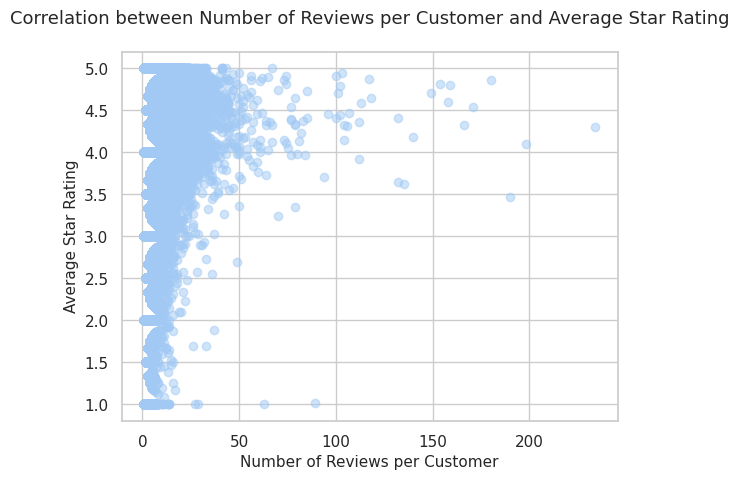

In [23]:
plt.scatter(customer_stats['num_reviews'], customer_stats['avg_star_rating'], alpha=0.5)
plt.xlabel("Number of Reviews per Customer", fontsize=11)
plt.ylabel("Average Star Rating", fontsize=11)
plt.title("Correlation between Number of Reviews per Customer and Average Star Rating", fontsize=13, pad=20)
plt.show()

In [24]:
product_mapping = df[['product_id', 'product_parent']].drop_duplicates()
unique_product_ids_per_parent = product_mapping.groupby('product_parent')['product_id'].nunique()

unique_product_ids_per_parent_df = unique_product_ids_per_parent.reset_index().rename(columns={'product_id': 'num_product_ids'})
unique_product_ids_per_parent_df.sort_values(by='num_product_ids', ascending=False).head(5)

,product_parent,num_product_ids
52888,318698851,51
137194,825631183,44
162300,976432208,38
43152,259482787,37
53958,325003594,34


##  Time series analysis

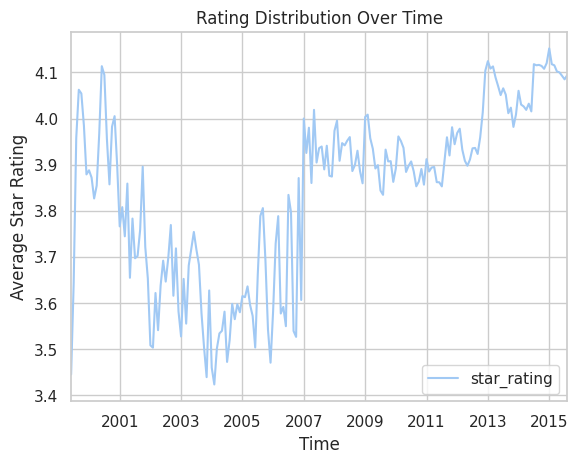

In [25]:
df['review_date'] = pd.to_datetime(df['review_date'])

rating_over_time = df[['review_date', 'star_rating']].copy()
rating_over_time.set_index('review_date', inplace=True)
rating_over_time = rating_over_time.resample('ME').mean()

rating_over_time.plot()
plt.title('Rating Distribution Over Time')
plt.xlabel('Time')
plt.ylabel('Average Star Rating')
plt.show()

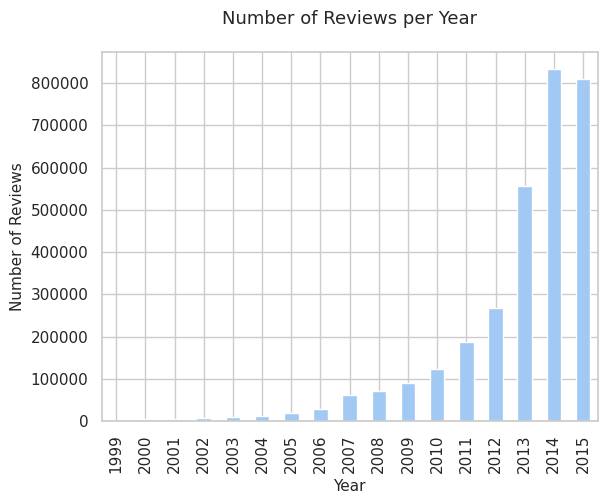

In [26]:
reviews_per_year = df[df['review_date'].notna()]
reviews_per_year = reviews_per_year['review_date'].dt.year.astype(int)

reviews_per_year = reviews_per_year.value_counts().sort_index()

reviews_per_year.plot(kind='bar')
plt.xlabel("Year", fontsize=11)
plt.ylabel("Number of Reviews", fontsize=11)
plt.title("Number of Reviews per Year", fontsize=13, pad=20)
plt.show()